In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")

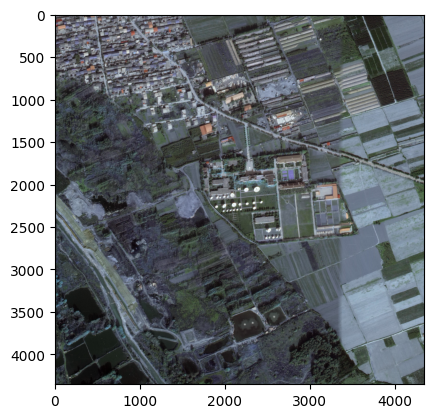

In [72]:
path = 'C:/Users/ABC/Downloads/Telegram Desktop/Xian_station-CN_GoogleSat_v0.tif'
img = cv2.imread(path)
# cv2.imshow(img, 'nothing')
plt.figure()
plt.imshow(img)
plt.show()

In [17]:
import cv2
def take_roi(path_to_img):
    img = cv2.imread(path_to_img)
    h0, w0 = img.shape[0], img.shape[1]
    resize = False
    if img.shape[0] > 1000:
        resize = True
        img = cv2.resize(img, (1000,int( 1000 * h0/w0)))
    bbox = cv2.selectROI(img, False)
    x, y, w, h = bbox[0], bbox[1], bbox[2], bbox[3]
    if resize == True:
        x = int(x/1000 * w0)
        y = int(y/1000*  w0)
        w = int((bbox[0] + bbox[2]) / 1000 * w0)- x
        h = int((bbox[1] + bbox[3]) / 1000 * w0) - y
        
    roi = img[y: y+h,x:x+w]
    # roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    cv2.destroyAllWindows()
    return roi, [x,y,w,h]
path = 'C:/Users/ABC/Downloads/Telegram Desktop/Xian_station-CN_GoogleSat_v0.tif'

In [93]:
for _ in range(5):
    _, bbox = take_roi(path)
    print(bbox)

[1222, 1027, 166, 148]
[1410, 857, 143, 178]
[2176, 1040, 165, 143]
[1949, 1418, 187, 148]
[1505, 578, 179, 166]


In [90]:
for _ in range(15):
    _, bbox = take_roi(path)
    print(bbox)

[2672, 1827, 161, 148]
[2454, 2502, 222, 165]
[2484, 3481, 196, 165]
[2167, 3551, 235, 222]
[1684, 1275, 187, 187]
[844, 2654, 270, 222]
[352, 557, 148, 152]
[1035, 108, 174, 144]
[2585, 1144, 213, 157]
[3337, 2489, 183, 130]
[1727, 4056, 192, 161]
[1484, 3742, 174, 157]
[1144, 3716, 279, 287]
[1005, 3394, 230, 257]
[900, 3142, 161, 156]


In [94]:
points = {'1':[2672, 1827, 161, 148],
         '2': [2454, 2502, 222, 165],
         '3':[2484, 3481, 196, 165],
         '4':[2167, 3551, 235, 222],
         '5':[1684, 1275, 187, 187],
         '6':[844, 2654, 270, 222],
         '7':[352, 557, 148, 152],
         '8':[1035, 108, 174, 144],
         '9': [2585, 1144, 213, 157],
         '10':[3337, 2489, 183, 130],
         '11': [1727, 4056, 192, 161],
         '12': [1484, 3742, 174, 157],
         '13': [1144, 3716, 279, 287],
         '14':[1005, 3394, 230, 257],
         '15': [900, 3142, 161, 156],
         '16':[1222, 1027, 166, 148],
         '17': [1410, 857, 143, 178],
         '18':[2176, 1040, 165, 143],
         '19':[1949, 1418, 187, 148],
         '20':[1505, 578, 179, 166]
         }

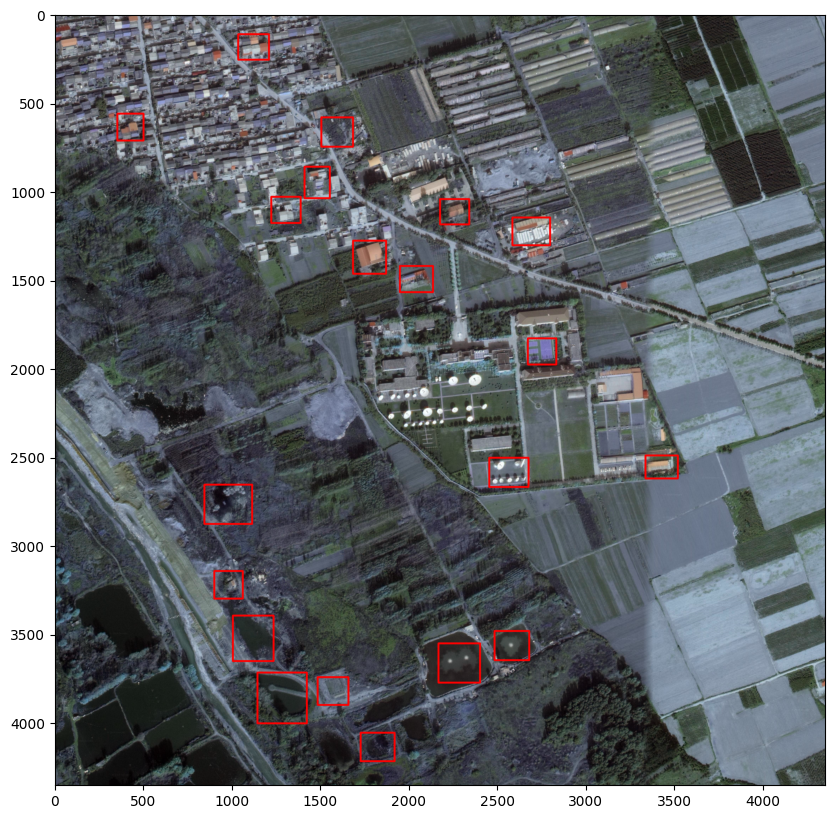

In [95]:
imgCopy = img.copy()
for key in points.keys():
    start_point = (points[key][0], points[key][1])
    end_point = (points[key][0] + points[key][2], points[key][1] + points[key][3])
    
    cv2.rectangle(imgCopy, start_point, end_point, (255,0,0), 10) 
plt.figure(figsize=(10,10))
plt.imshow(imgCopy)
plt.show()

In [46]:
def bboxFromObj(cropImg, obj):
    xMin = max(cropImg[0], obj[0]) - cropImg[0]
    yMin = max(cropImg[1], obj[1]) - cropImg[1]
    xMax = min(cropImg[0] + cropImg[2], obj[0]+ obj[2]) - cropImg[0]
    yMax = min(cropImg[1] + cropImg[3], obj[1]+ obj[3]) - cropImg[1] 
    if xMax - xMin < 0 or yMax - yMin < 0 or (xMax-xMin)*(yMax-yMin) < 100:
        return None
    else: return [xMin, yMin, xMax, yMax]

In [101]:

path ='C:/Users/ABC/Downloads/Telegram Desktop/Xian_station-CN_GoogleSat_v0.tif'
annotation_Path = 'C:/Users/ABC/Downloads/Telegram Desktop/annotations/train/0001/'
annotation_txt = annotation_Path + 'annotations.txt'
count = 1
x = np.linspace(0, 3000, 1000)
y = np.linspace(0, 2000, 1000)
for i in range(1000):
    
    x0 = np.random.randint(int(x[i]) -5, int(x[i])+ 5)
    y0 = np.random.randint(int(y[i]) -5, int(y[i])+ 5)
    saveToAnnot = False
    if y0 +1000 < img.shape[0] and x0 + 1000 < img.shape[1]:
        
        cropImg = [x0, y0, 1000, 1000]
        for key in points.keys():
            
            bb = bboxFromObj(cropImg, points[key])
            if bb is not None:
                imgSave = img[y0:y0+1000, x0:x0+1000]
                
                cv2.imwrite(annotation_Path + f'{count:05}.jpg', imgSave)
                # line = key + str(bb[0]) + str(bb[1]) + str(bb[2])+ str(bb[3])
                line = f'{count:05}, {key}, {bb[0]}, {bb[1]}, {bb[2]}, {bb[3]}\n'
                with open(annotation_txt, 'a')as f:
                    f.write(line)
                saveToAnnot = True
        if saveToAnnot is True: count += 1
print(count)

1001


In [106]:

x = np.linspace(500, 2000, 700)
y = np.linspace(2500, 3300, 700)
path ='C:/Users/ABC/Downloads/Telegram Desktop/Xian_station-CN_GoogleSat_v0.tif'
annotation_Path = 'C:/Users/ABC/Downloads/Telegram Desktop/annotations/train/0002/'
annotation_txt = annotation_Path + 'annotations.txt'
count  = 1
for i in range(700):
    
    x0 = int(x[i])
    y0 = int(y[i])
    saveToAnnot = False
    if y0 +1000 < img.shape[0] and x0 + 1000 < img.shape[1]:
        
        cropImg = [x0, y0, 1000, 1000]
        for key in points.keys():
            bb = bboxFromObj(cropImg, points[key])
            if bb is not None:
                imgSave = img[y0:y0+1000, x0:x0+1000]
                
                cv2.imwrite(annotation_Path + f'{count:05}.jpg', imgSave)
                # line = key + str(bb[0]) + str(bb[1]) + str(bb[2])+ str(bb[3])
                line = f'{count:05}, {key}, {bb[0]}, {bb[1]}, {bb[2]}, {bb[3]}\n'
                with open(annotation_txt, 'a')as f:
                    f.write(line)
                saveToAnnot = True
        if saveToAnnot is True: count += 1
print(count)

701


In [107]:

x = np.linspace(1500, 2500, 500)
y = np.linspace(3300, 2500, 500)
path ='C:/Users/ABC/Downloads/Telegram Desktop/Xian_station-CN_GoogleSat_v0.tif'
annotation_Path = 'C:/Users/ABC/Downloads/Telegram Desktop/annotations/train/0003/'
annotation_txt = annotation_Path + 'annotations.txt'
count  = 1
for i in range(500):
    
    x0 = int(x[i])
    y0 = int(y[i])
    saveToAnnot = False
    if y0 +1000 < img.shape[0] and x0 + 1000 < img.shape[1]:
        
        cropImg = [x0, y0, 1000, 1000]
        for key in points.keys():
            bb = bboxFromObj(cropImg, points[key])
            if bb is not None:
                imgSave = img[y0:y0+1000, x0:x0+1000]
                
                cv2.imwrite(annotation_Path + f'{count:05}.jpg', imgSave)
                # line = key + str(bb[0]) + str(bb[1]) + str(bb[2])+ str(bb[3])
                line = f'{count:05}, {key}, {bb[0]}, {bb[1]}, {bb[2]}, {bb[3]}\n'
                with open(annotation_txt, 'a')as f:
                    f.write(line)
                saveToAnnot = True
        if saveToAnnot is True: count+= 1
print(count)

501


In [109]:

path ='C:/Users/ABC/Downloads/Telegram Desktop/Xian_station-CN_GoogleSat_v0.tif'
annotation_Path = 'C:/Users/ABC/Downloads/Telegram Desktop/annotations/train/0004/'
annotation_txt = annotation_Path + 'annotations.txt'
x =np.linspace(2000, 2500, 500)
y =np.linspace(1000, 2500, 500)

count = 1
for i in range(500):
    
    x0 = int(x[i])
    y0 = int(y[i])
    saveToAnnot = False
    if y0 +1000 < img.shape[0] and x0 + 1000 < img.shape[1]:
        
        cropImg = [x0, y0, 1000, 1000]
        for key in points.keys():
            
            bb = bboxFromObj(cropImg, points[key])
            if bb is not None:
                
                imgSave = img[y0:y0+1000, x0:x0+1000]
                
                cv2.imwrite(annotation_Path + f'{count:05}.jpg', imgSave)
                # line = key + str(bb[0]) + str(bb[1]) + str(bb[2])+ str(bb[3])
                line = f'{count:05}, {key}, {bb[0]}, {bb[1]}, {bb[2]}, {bb[3]}\n'
                with open(annotation_txt, 'a')as f:
                    f.write(line)
                saveToAnnot = True
        if saveToAnnot is True: count += 1
print(count)

501


In [112]:
path ='C:/Users/ABC/Downloads/Telegram Desktop/Xian_station-CN_GoogleSat_v0.tif'
annotation_Path = 'C:/Users/ABC/Downloads/Telegram Desktop/annotations/test/0001/'
annotation_txt = annotation_Path + 'annotations.txt'
x =np.linspace(0, 3300, 1000)
y =np.linspace(0, 2500, 1000)

count = 1
for i in range(1000):
    
    x0 = int(x[i])
    y0 = int(y[i])
    saveToAnnot = False
    if y0 +1000 < img.shape[0] and x0 + 1000 < img.shape[1]:
        
        cropImg = [x0, y0, 1000, 1000]
        for key in points.keys():
            
            bb = bboxFromObj(cropImg, points[key])
            if bb is not None:
                
                imgSave = img[y0:y0+1000, x0:x0+1000]
                
                cv2.imwrite(annotation_Path + f'{count:05}.jpg', imgSave)
                # line = key + str(bb[0]) + str(bb[1]) + str(bb[2])+ str(bb[3])
                line = f'{count:05}, {key}, {bb[0]}, {bb[1]}, {bb[2]}, {bb[3]}\n'
                with open(annotation_txt, 'a')as f:
                    f.write(line)
                saveToAnnot = True
        if saveToAnnot is True: count += 1
print(count)

1001


In [114]:
path ='C:/Users/ABC/Downloads/Telegram Desktop/Xian_station-CN_GoogleSat_v0.tif'
annotation_Path = 'C:/Users/ABC/Downloads/Telegram Desktop/annotations/test/0002/'
annotation_txt = annotation_Path + 'annotations.txt'
x =np.linspace(500, 2500, 1000)
y =np.linspace(2500, 3300, 1000)

count = 1
for i in range(1000):
    
    x0 = int(x[i])
    y0 = int(y[i])
    saveToAnnot = False
    if y0 +1000 < img.shape[0] and x0 + 1000 < img.shape[1]:
        
        cropImg = [x0, y0, 1000, 1000]
        for key in points.keys():
            
            bb = bboxFromObj(cropImg, points[key])
            if bb is not None:
                
                imgSave = img[y0:y0+1000, x0:x0+1000]
                
                cv2.imwrite(annotation_Path + f'{count:05}.jpg', imgSave)
                # line = key + str(bb[0]) + str(bb[1]) + str(bb[2])+ str(bb[3])
                line = f'{count:05}, {key}, {bb[0]}, {bb[1]}, {bb[2]}, {bb[3]}\n'
                with open(annotation_txt, 'a')as f:
                    f.write(line)
                saveToAnnot = True
        if saveToAnnot is True: count += 1
print(count)

1001
